# **Welcome to the House Price Prediction System**

## Introduction
The purpose of this project is to predict the median house value in different districts of California based on various attributes. To achieve this goal, we will start by downloading the dataset and taking a quick look at the data to understand its structure. We will then explore and visualize the data to identify patterns and relationships between different attributes and the target variable. After preparing the data for machine learning algorithms, we will select and train multiple models, evaluate their performance using metrics such as mean absolute error and root mean square error, and fine-tune them using randomized search and grid search CV. We will then select the best-performing model and evaluate its performance on a test set. Finally, we will save and load the final model using joblib, enabling us to make predictions on new data. Through this project, we aim to develop a robust and accurate model for predicting house prices in California.

# **Get the Data**

The first step in this project is to obtain the data. To do this, we will download the data and import the necessary libraries, including pandas for data manipulation and urllib.request for downloading the data. We will create a function called load_housing_data that will handle the data download and extraction process.

## Download the Data

Here's how it works:

- We will first create a variable tarball_path that will store the path to the directory where our housing data will be stored.
- We will then check if the data file exists in the tarball_path. If it doesn't exist, we will create a directory called datasets to store the data.
- Next, we will specify the URL from which we want to download the data and use the urlretrieve function to download the data to the tarball_path.
- Since the data is in zip format, we will use the tarfile library to open and extract the data to the datasets directory.
- Once the data is extracted, we will read it into a CSV file and convert it to a pandas DataFrame.

By following these steps, we will be able to load the housing data into a DataFrame, which we can then use for further analysis and modeling.

This function will download the data, extract it, and load it into a DataFrame, which we can then use for further analysis and modeling.

In [79]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Take a Quick Look at the Data Structure

The next step is to take a closer look at the data structure. To do this, we will use various methods to understand the overall structure of the data.

- We will start by using the housing.head() method to view the first few rows of the data and understand what the data looks like, including the columns and values.

In [80]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Next, we will use the housing.info() method to get information about the data, including the total number of columns and rows. From this, we can see that there are 10 columns and 20640 rows.

In [81]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Upon examining the column names, we can see that there are 9 feature columns (longitude, latitude, housing medium age, total rooms, total bedrooms, population, households, median income, and ocean proximity) and 1 target column (median house value).
- We also notice that the ocean proximity column is a categorical column, while the rest of the columns are numerical. Additionally, we see that the total bedrooms column has some missing values.

- To further understand the categorical column, we will view the value counts for the ocean proximity column and find that it has 5 categories: less than 1H, ocean inland, near ocean, near bay, and island.

In [82]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


- Next, we will use the housing.describe() method to get a statistical summary of the data, including the mean, maximum, and minimum values for each feature.

In [83]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Finally, we will plot the numerical columns to visualize their distribution and find that the total rooms, total bedrooms, population, households, and median income columns are right-skewed.

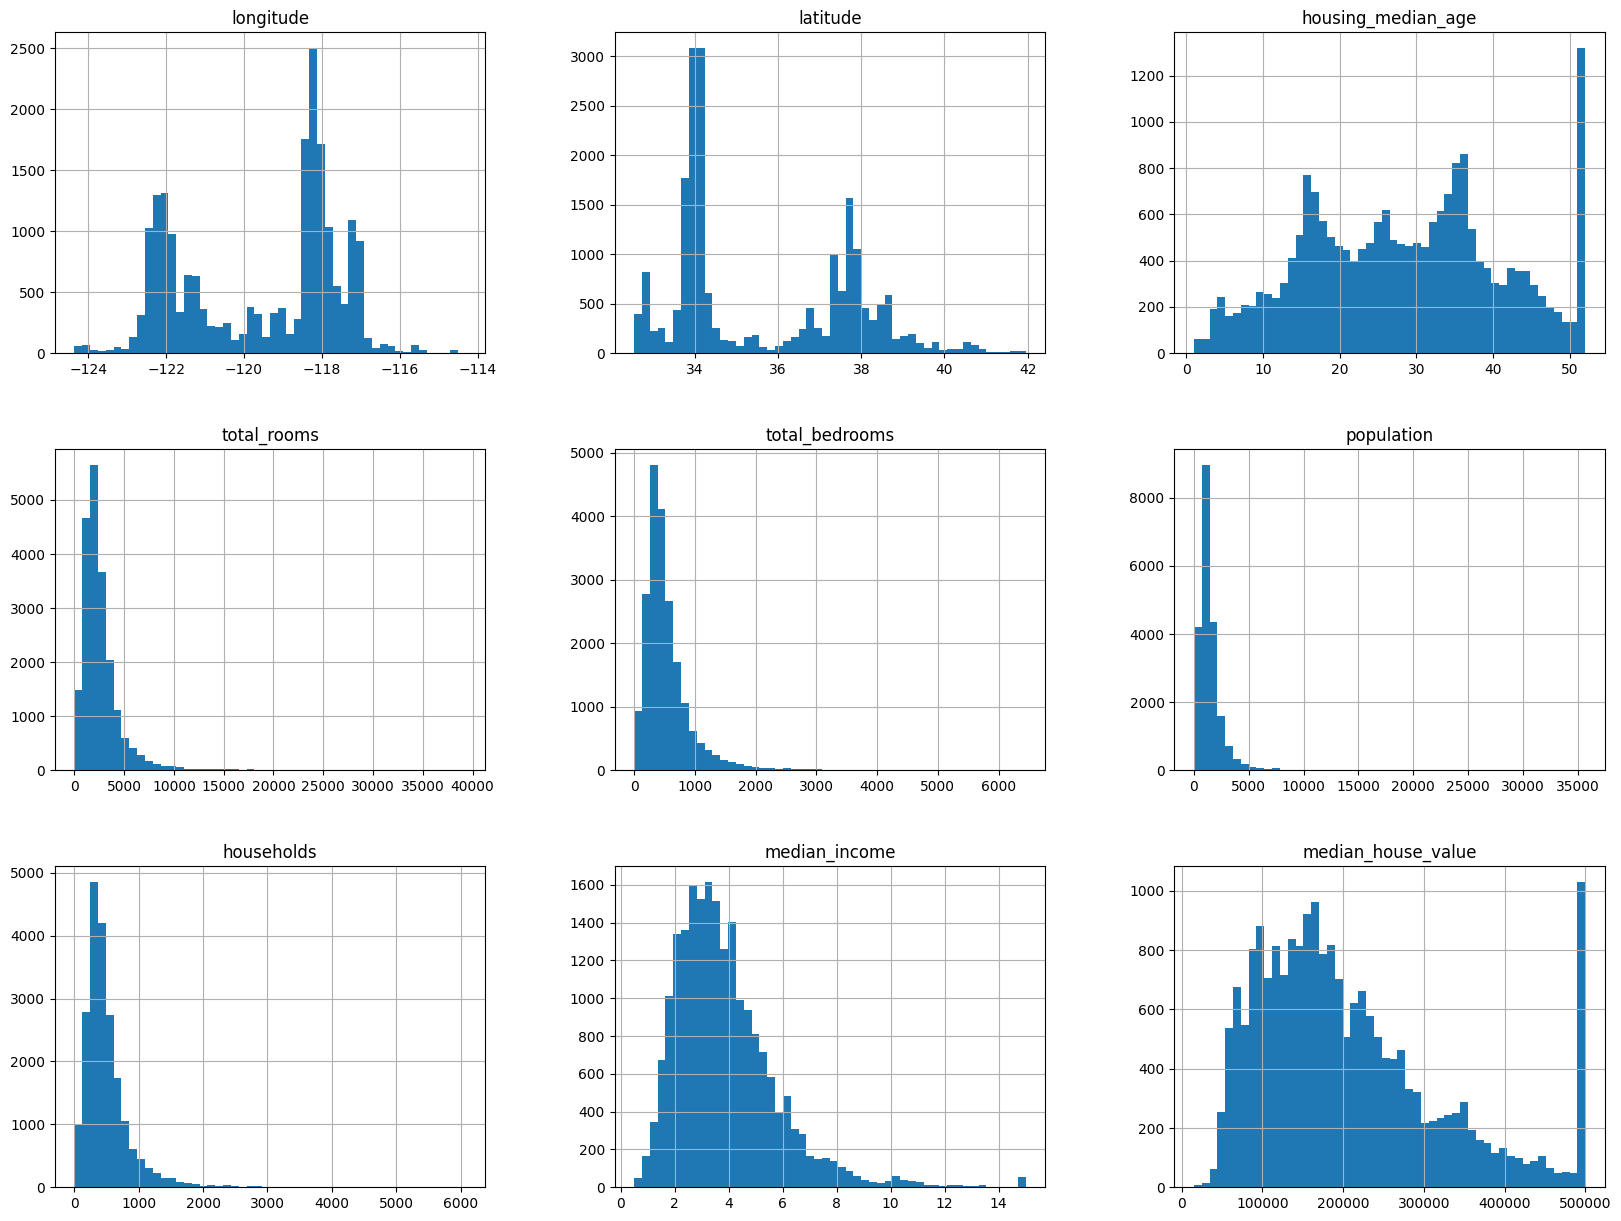

In [84]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))

plt.show()

By taking a closer look at the data structure, we can gain a better understanding of the data and identify any potential issues or patterns that may impact our analysis and modeling.

Some key observations from this step include:

- The data has mostly numerical and only one categorical column.
- There are missing values in the total bedrooms column.
- The ocean proximity column has 5 categories.
- The numerical columns have varying distributions, with some being right-skewed.

These observations will inform our next steps in the analysis and modeling process.

## Create a test set

The next step is to create a test set, which is an essential part of the machine learning workflow. By creating a test set at the beginning, we can ensure that our model is not biased towards the data and that there is no data leakage throughout the modeling process. This will help our model perform well on unseen data.

### Method 5: Stratified Sampling (BEST METHOD ✅)

To create the test set, we will use stratified sampling, which is a technique that ensures the same proportion of data is split between the training and testing sets. We will use the median income column as the basis for splitting the data, as it is a key feature that can help us create a representative test set.

To implement stratified sampling, we will first create bins for the median income column, which will categorize the data into different income groups. We will then use these bins to split the data into training and testing sets, ensuring that the same proportion of data is represented in both sets.

In [85]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

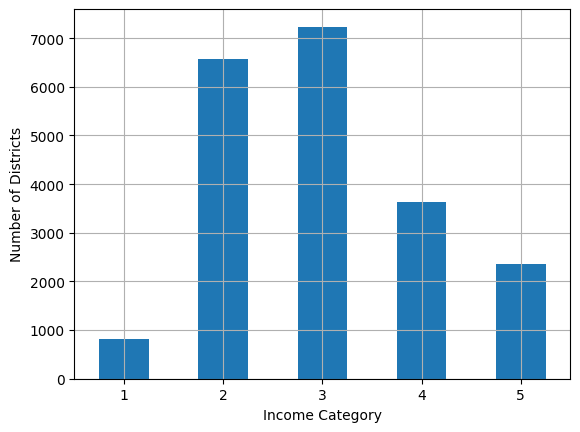

In [86]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

In [88]:
strat_train_set, strat_test_set = strat_splits[0]

Shortcut Method

In [89]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

By using stratified sampling, we can ensure that our test set is representative of the overall data distribution, which will help us evaluate our model's performance accurately. This approach will also help us avoid overfitting and ensure that our model generalizes well to new, unseen data.

In [90]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [91]:
housing["income_cat"].value_counts()/len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


After splitting the data into training and testing sets using stratified sampling, we verified that the split was done in the same proportion. Upon checking the output, we confirmed that both the training and testing sets were split in the same proportion, which is a good indication that the stratified sampling approach worked as expected.

In [92]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

Once we verified the split, we removed the extra income_cat column that we created for the purpose of stratified sampling. This column was no longer needed, and removing it helped to declutter the dataset and prevent any potential issues that might arise from having an unnecessary column.

By removing the income_cat column, we ensured that our dataset was clean and ready for further analysis and modeling. We can now proceed with confidence, knowing that our data is well-prepared and that our test set is representative of the overall data distribution.

# **Explore and Visualize the Data to Gain Insights**

From now on, we will only use the training set for all the steps, and we will keep the testing set hidden until the final evaluation of our model. This is a good practice to ensure that our model is not overfitting to the test data and that we get an unbiased estimate of its performance.

By keeping the test set hidden, we can simulate real-world scenarios where our model will be deployed on unseen data. This approach will help us to evaluate our model's performance accurately and make necessary adjustments to improve its performance.

We will apply all the steps, including data preprocessing, feature engineering, model selection, and hyperparameter tuning, only on the training set. This will ensure that our model is trained and validated on the training data, and we can then use the test set to evaluate its performance only once, at the end.

By following this approach, we can ensure that our model is robust, reliable, and generalizes well to new, unseen data.

In [93]:
housing = strat_train_set.copy()

## Visualize Geographical Data

The first step is to visualize the geographical data, specifically the population distribution across different regions. To do this, we will create a scatter plot based on longitude and latitude, which will give us an idea of the population density in different areas.

We will start by creating a scatter plot with longitude on the x-axis and latitude on the y-axis, and the size or color of each point will represent the population density. To make the plot more informative, we will use a transparency level of alpha = 0.2, which will help us identify areas with high population density.

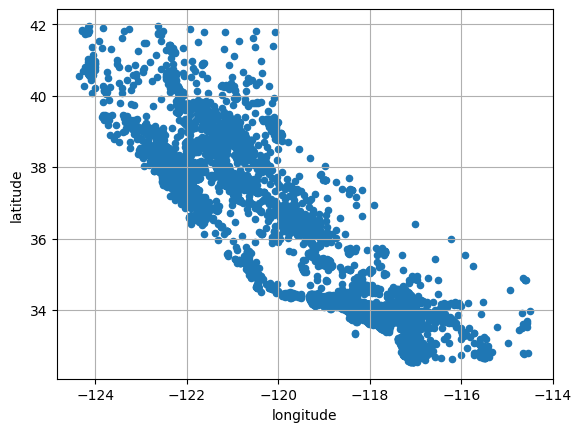

In [94]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

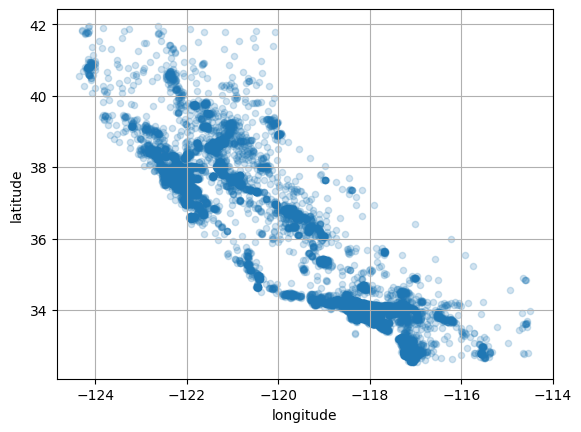

In [95]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

The resulting plot will show areas with high population density as darker regions, while areas with low population density will appear lighter. This will give us a clear idea of which regions have a high population and which regions have a low population.

To further enhance the visualization, we will use a color scale to represent the population density. The color scale will range from red (high population) to black (low population), which will give us a clear visual representation of the population distribution across different regions.

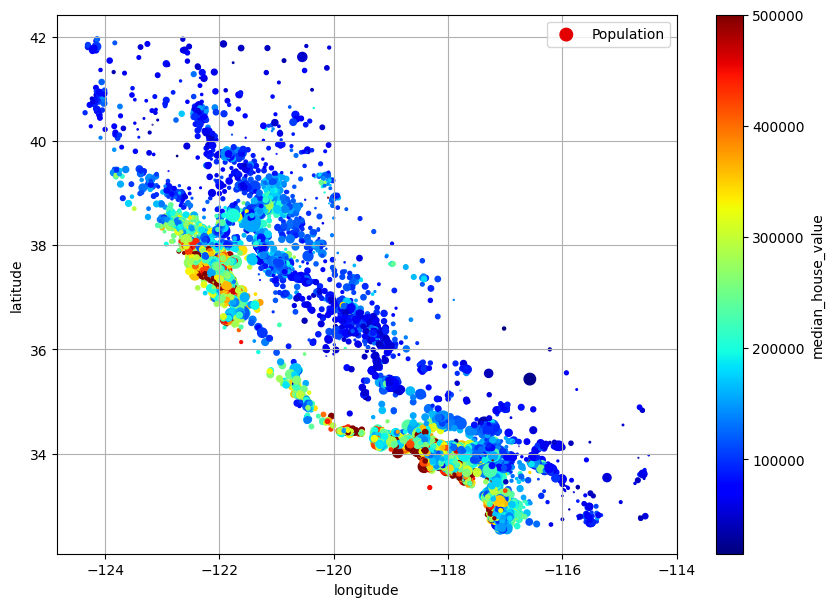

In [96]:
housing.plot(
    kind="scatter", x="longitude", y="latitude",
    grid=True, s=housing["population"]/100, label="Population",
    c="median_house_value", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10,7))

plt.show()

By using this visualization technique, we will be able to identify areas with high population density and understand the geographical distribution of the population. This will be a valuable insight for our analysis and modeling tasks.

The scatter plot will provide a visual representation of the population distribution, allowing us to:

- Identify areas with high population density
- Understand the geographical distribution of the population
- Visualize the relationship between longitude, latitude, and population density

This visualization will be a useful tool for understanding the population distribution and will inform our subsequent analysis and modeling tasks.

## Looking for Correlations

The next step is to check the correlation between the median house value and other numerical columns in the dataset. To do this, we will create a correlation matrix that includes all the numerical columns, and then we will check the correlation between median house value and each of these columns.

In [97]:
corr_matrix = housing.corr(numeric_only=True)

After calculating the correlation coefficients, we will sort the values to see which columns have the strongest correlation with median house value.

In [98]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


The results show that median house value has a strong correlation with median income (0.68), and a moderate correlation with total rooms (0.137) and housing median age (0.102).

These results indicate that median income is the most strongly correlated feature with median house value, which makes sense given that housing prices are often closely tied to the income levels of the surrounding area. The correlations with total rooms and housing median age are also positive, but not as strong as the correlation with median income.

The correlation coefficients provide valuable insights into the relationships between the different features in the dataset and the target variable, median house value. By understanding these relationships, we can identify the most important features to focus on in our analysis and modeling tasks.

Some key observations from the correlation analysis include:

- Median house value is strongly correlated with median income (0.68)
- Median house value has a moderate correlation with total rooms (0.137) and housing median age (0.102)
- The correlations with other columns are relatively weak

These findings will inform our subsequent analysis and modeling tasks, and help us to identify the most important features to include in our models.

**scatter matrix**
The next step is to create a scatter matrix plot to visualize the relationships between the columns that have a strong correlation with median house value. We will include median house value, median income, total rooms, and housing median age in the scatter matrix plot.

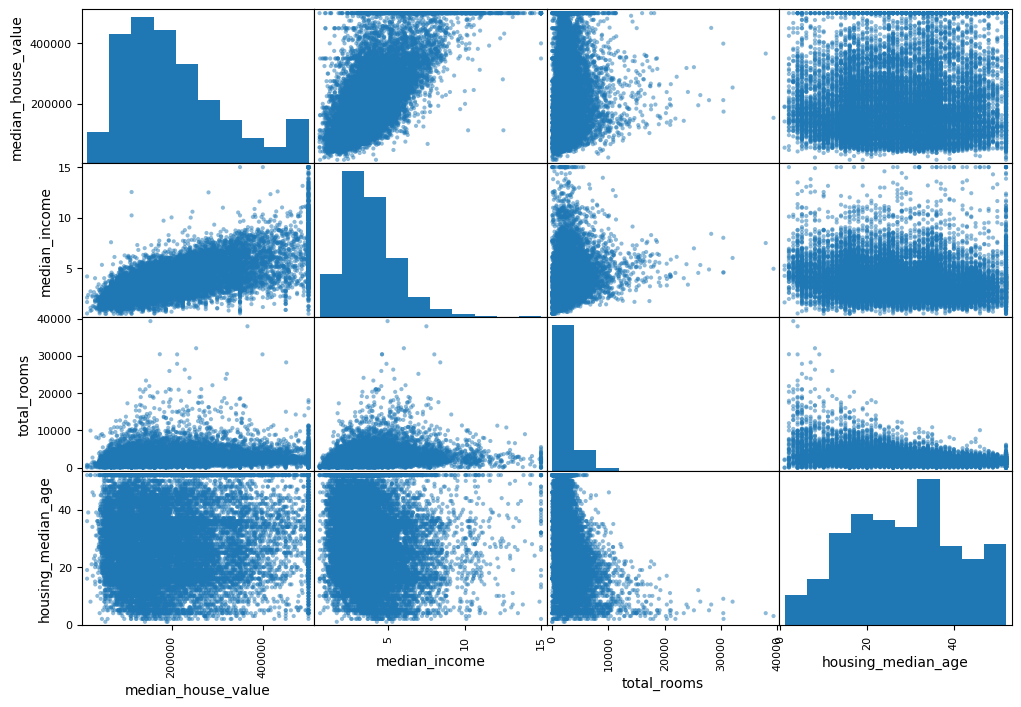

In [99]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

The scatter matrix plot will help us to identify the linear relationships between these columns and median house value. Upon examining the plot, we notice that median income has a strong linear relationship with median house value. The other columns, such as total rooms and housing median age, do not show a strong linear relationship with median house value.

<Axes: xlabel='median_income', ylabel='median_house_value'>

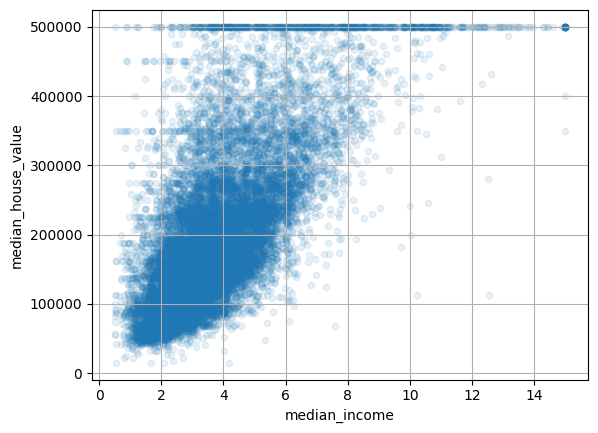

In [100]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             grid=True, alpha=0.1)

When we create a separate scatter plot of median income vs. median house value, we can see the linear relationship more clearly. However, we also notice that there is a cap at around $500,000, where many values seem to be clustered in a straight line. This suggests that there may be some kind of artificial limit or ceiling on the median house values in the dataset.

The scatter plot provides valuable insights into the relationships between the columns and helps us to identify potential issues with the data, such as the artificial cap on median house values. This information will be useful in our subsequent analysis and modeling tasks.

Some key observations from the scatter matrix plot include:

- Median income has a strong linear relationship with median house value
- Total rooms and housing median age do not show a strong linear relationship with median house value
- There is an artificial cap on median house values at around $500,000

These findings will inform our subsequent analysis and modeling tasks, and help us to develop a better understanding of the relationships between the columns in the dataset.

## Experimenting with Attribute Combinations

The next step is to experiment with attribute combinations by creating new columns that might be more informative than the original columns. We will create three new columns:

1. Rooms per house: This column will be calculated by dividing the total number of rooms by the number of households.
2. Bedroom ratio: This column will be calculated by dividing the total number of bedrooms by the total number of rooms.
3. People per house: This column will be calculated by dividing the population by the number of households.

In [101]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

After creating these new columns, we will recalculate the correlation matrix and check the correlation between these new columns and the median house value.

In [102]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


The results show that the "rooms per house" column has a correlation of 0.14 with median house value, which is a moderate correlation. The "bedroom ratio" column has a correlation of 0.054, which is a weak correlation. The "people per house" column does not have a strong correlation with median house value.

The fact that the "rooms per house" column has a stronger correlation with median house value than some of the original columns suggests that this new column might be a useful feature to include in our model. By creating new columns that capture different aspects of the data, we can potentially improve the performance of our model.

Some key observations from this step include:

- The "rooms per house" column has a moderate correlation with median house value (0.14)
- The "bedroom ratio" column has a weak correlation with median house value (0.054)
- The "people per house" column does not have a strong correlation with median house value

These findings will inform our subsequent analysis and modeling tasks, and help us to identify the most useful features to include in our model.

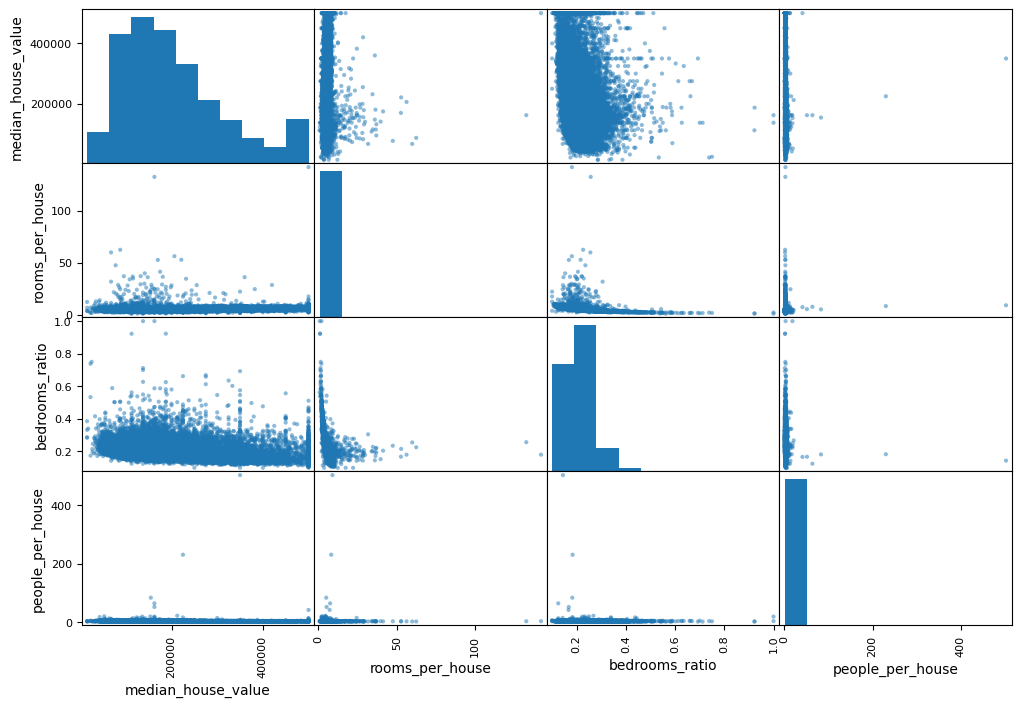

In [103]:
attributes = ["median_house_value", "rooms_per_house", "bedrooms_ratio", "people_per_house"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Let's summarize the key findings from the scatter plot analysis:

- The "rooms per house" column has a moderate positive correlation with median house value, but the relationship is not extremely strong.
- The "people per house" column has a very weak relationship with median house value.
- The "bedroom ratio" column has a moderate negative correlation with median house value, indicating that as the bedroom ratio increases, the median house value tends to decrease.

These findings provide valuable insights into the relationships between the new columns and median house value, and can inform our subsequent analysis and modeling tasks.

<Axes: xlabel='bedrooms_ratio', ylabel='median_house_value'>

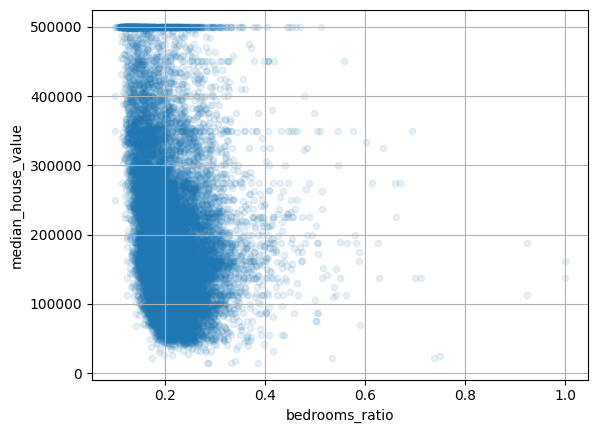

In [104]:
housing.plot(kind="scatter", x="bedrooms_ratio", y="median_house_value",
             grid=True, alpha=0.1)

# **Prepare the Data for Machine Learning Algorithms**

The next step is to prepare the data for machine learning. Before we can train a model, we need to split the training set into features and labels.

We will create two separate datasets:

- housing: This will contain the features, which are the input variables that our model will use to make predictions.
- housing_labels: This will contain the labels, which are the target variables that our model is trying to predict.

By splitting the data into features and labels, we can prepare it for use in machine learning algorithms and start building our model.

In [105]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Transformation Pipelines

To prepare the data, we will use transformation pipelines, which are reusable and efficient. For this, we will import the following:

- StandardScaler for scaling numerical features
- SimpleImputer for handling missing values
- OneHotEncoder for encoding categorical features
- Pipeline and make_pipeline for creating pipelines
- ColumnSelector and make_column_selector for selecting specific columns
- ColumnTransformer for applying different transformations to different columns
- FunctionTransformer for applying custom transformations

Additionally, we will import set_config to control the display of our pipeline, making it more readable and understandable.

By using these imports, we can create a robust and efficient data transformation pipeline that prepares our data for machine learning modeling.

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import FunctionTransformer

In [107]:
from sklearn import set_config
set_config(display="diagram")

### Clustering Custom Transformer

Let's create a custom transformer called ClusterSimilarity. This custom class will calculate the similarity between a point and different clusters or districts.

In this class, we will define the following methods:

- fit: This method will train the transformer.
- transform: This method will transform the data.
- get_feature_names_out: This method will return the feature names of the transformed data.

By creating this custom transformer, we can add cluster similarity information to our data and use it in machine learning models.

In [108]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

### Ratio Function and pipeline

Let's create a ratio function and its pipeline. We will define a function called column_ratio that takes two columns and returns their ratio. Additionally, we will define another function called ratio_name that returns the name of the ratio column.

Next, we will create a pipeline for the ratio transformation. The pipeline will consist of the following steps:

- SimpleImputer with a strategy of "median" to handle missing values
- FunctionTransformer that applies the column_ratio function and gets the feature names from the ratio_name function
- StandardScaler to scale the ratio values

By creating this pipeline, we can efficiently apply the ratio transformation to our data and prepare it for further analysis or modeling.

In [109]:
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(functuion_transformer, feature_names_in_):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())

### Log pipeline

Let's create a log pipeline to handle skewed features. The log pipeline will be used to transform the data by applying a logarithmic function to reduce skewness.

The log pipeline will consist of the following steps:

- SimpleImputer with a strategy of "median" to handle missing values
- FunctionTransformer that applies the np.log1p function to the data, which is equivalent to log(1 + x). This is used to avoid infinity values when the input is zero.
- The inverse function will be np.expm1, which is equivalent to exp(x) - 1. This will be used to transform the data back to its original scale.
- StandardScaler will be used to scale the log-transformed data.

By creating this log pipeline, we can efficiently apply the log transformation to our skewed data and prepare it for further analysis or modeling. The np.log1p function will help to stabilize the variance and reduce the effect of extreme values.

In [110]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, inverse_func=np.expm1, feature_names_out="one-to-one"),
    StandardScaler()
)

### Cluster Similarity Object

Let's create an object of the ClusterSimilarity class that we defined earlier. We will pass the following parameters to the class:

- n_clusters=10: This will specify the number of clusters to use for the similarity calculation.
- gamma=1.0: This will control the spread of the similarity values.
- random_state=42: This will ensure reproducibility of the results.

By creating this object, we can use the ClusterSimilarity class to calculate the similarity between different data points and the clusters. This can be a useful feature engineering technique to capture complex relationships in the data.

In [111]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

### Numerical Columns pipeline

Let's create a pipeline for numerical columns, which we'll call the num_pipeline. This pipeline will consist of the following steps:

- SimpleImputer with a strategy of "median" to handle missing values in the numerical columns.
- StandardScaler to scale the numerical values.

By creating this pipeline, we can efficiently preprocess the numerical columns in our data and prepare them for further analysis or modeling. The SimpleImputer will ensure that missing values are handled properly, and the StandardScaler will help to stabilize the variance and improve the performance of machine learning models.

In [112]:
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

### Categorical Columns pipeline

Let's create a pipeline for categorical columns. This pipeline will consist of the following steps:

- SimpleImputer with a strategy of "most_frequent" to handle missing values in the categorical columns.
- OneHotEncoder with the parameter handle_unknown="ignore" to encode the categorical values into numerical representations.

By setting handle_unknown="ignore", we ensure that any unknown categories that may appear in the test data will be ignored, rather than raising an error. This can help to improve the robustness of our model and prevent errors due to unexpected categories.

In [113]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

Let's create the final preprocessing object using ColumnTransformer. This object will apply different pipelines to different columns in the data.

The ColumnTransformer will consist of the following transformations:

- bedrooms_ratio: ratio_pipeline will be applied to the columns total_bedrooms and total_rooms.
- rooms_per_house: ratio_pipeline will be applied to the columns total_rooms and households.
- people_per_house: ratio_pipeline will be applied to the columns population and households.
- log: log_pipeline will be applied to the skewed columns total_bedrooms, total_rooms, population, households, and median_income.
- geo: cluster_similarity object will be applied to the columns latitude and longitude.
- cat: cat_pipeline will be applied to the categorical columns.
- num: num_pipeline will be applied to the remaining numerical columns.

By creating this final preprocessing object, we can efficiently apply different transformations to different columns in the data and prepare it for further analysis or modeling.

In [114]:
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder = default_num_pipeline) # one column remaining: housing_median_age

Let's store the prepared data in the housing_prepared variable by applying the fit_transform method of the preprocessing object to the housing training set features.

The housing_prepared variable will now hold the final prepared data. We can then check the shape of housing_prepared to see the number of rows and columns. In this case, we have 16512 rows and 24 columns.

In [115]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

Additionally, we can use the get_feature_names_out method of the preprocessing object to get the names of all the columns in the prepared data. This will give us a list of column names that we can use for further analysis or modeling.

In [116]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# **Select and Train a Model**

## Training and Evaluating on the Training Set

### LinearRegression Model

Let's move on to the next step, which is to select and train a model. We'll start by training and evaluating a Linear Regression model on the training set.

We'll import the Linear Regression model and create a pipeline that includes the preprocessing steps and the Linear Regression model. This pipeline will allow us to chain the preprocessing and modeling steps together.

Once we have the pipeline, we'll fit it to the training data, housing and housing_labels. This will train the model on the preprocessed data.

In [117]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x799...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7998898fae50>)])),
                ('linearregression', LinearRegression())])

Next, we'll use the trained pipeline to make predictions on the housing data. We'll then compare the predicted values to the original values to see how well the model is performing.

In [118]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([245800., 380900., 120700.,  94300., 326600.])

In [119]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [120]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.4%, -21.3%, 18.7%, -1.9%, -9.7%


When we compare the predicted values to the original values, we see that there are significant differences, with errors ranging from -47%, -22%, 25% etc. This suggests that the Linear Regression model may not be performing well on this dataset.

Warning: In recent versions of Scikit-Learn, you must use root_mean_squared_error(labels, predictions) to compute the RMSE, instead of mean_squared_error(labels, predictions, squared=False). The following try/except block tries to import root_mean_squared_error, and if it fails it just defines it.

In [121]:
try:
  from sklearn.metrics import root_mean_squared_error
except ImportError:
  from sklearn.metrics import mean_squared_error

  def root_mean_squared_error(labels, predictions):
    return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

67027.33777469015

Let's evaluate the Linear Regression model using the Root Mean Squared Error (RMSE). We'll import the RMSE function and pass in the original labels and predictions to get the score.

The RMSE score for the Linear Regression model is 68647.9568. This score indicates the amount of error in the model's predictions. A high RMSE score suggests that the model has a significant amount of error in its predictions.

### DecisionTreeRegressor Model

Let's train a new model called Decision Tree Regressor. We'll create a pipeline that includes the preprocessing steps and the Decision Tree Regressor.

Once we have the pipeline, we'll fit it to the training data, housing and housing_labels. This will train the model on the preprocessed data.

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x799...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7998898fae50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Next, we'll use the trained pipeline to make predictions on the data. After making predictions, we'll evaluate the model's performance using the Root Mean Squared Error (RMSE).

In [123]:
housing_predictions = tree_reg.predict(housing)

tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

The RMSE score for the Decision Tree Regressor model is 0.0, which suggests that the model is perfectly fitting the training data. However, this is likely due to overfitting, where the model is fitting the noise in the training data rather than the underlying patterns.

To confirm this, we'll use cross-validation to evaluate the model's performance on unseen data. This will give us a more accurate estimate of the model's performance.

## Better Evaluation Using Cross-Validation

### Cross-Validation on DecisionTreeRegressor

Let's apply cross-validation to the Decision Tree Regressor model to get a better estimate of its performance. We'll use the cross_val_score function from scikit-learn to perform 10-fold cross-validation.

The scoring metric we'll use is negative root mean squared error. After applying cross-validation, we'll store the results in a pandas Series and calculate the mean score.

In [124]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)

In [125]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66368.234045
std,1976.425012
min,63556.305624
25%,65007.028324
50%,65886.897085
75%,68129.026040
max,69530.301101


The mean score for the Decision Tree Regressor model is 66366.9836. This suggests that the model has a significant amount of error in its predictions.

### Cross-Validation on LinearRegressor

Let's apply cross-validation to the Linear Regression model. We'll create a cross_val_score object with the Linear Regression pipeline, housing data, and housing labels. The scoring metric will be negative root mean squared error, and we'll use 10-fold cross-validation.

After applying cross-validation, we'll store the results in a pandas Series and calculate the mean score.

In [126]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,68073.369529
std,3500.826075
min,64097.861823
25%,66702.337691
50%,67265.246377
75%,68040.960091
max,77152.861528


The mean score for the Linear Regression model is 69847.923.

This score is slightly higher than the Decision Tree Regressor model, indicating that the Linear Regression model has a slightly higher error rate. However, both models have significant errors, and we may need to consider other models or techniques to improve performance.

Model Comparison

- Decision Tree Regressor: 66366.9836 (mean RMSE score)
- Linear Regression: 69847.923 (mean RMSE score)

### RandomForestRegressor Model

Let's try a new model, Random Forest Regressor. We'll create a pipeline that includes preprocessing and the Random Forest Regressor with a random state of 42.

After fitting the pipeline to the training data, we'll use it to make predictions on the housing data.

In [127]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x799...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7998898fae50>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

We'll then evaluate the model's performance using the Root Mean Squared Error (RMSE) metric.

In [128]:
housing_predictions = forest_reg.predict(housing)

forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17522.564664280857

The RMSE score for the Random Forest Regressor model is 17521, which is significantly better than the previous models.

### Cross-Validation on RandomForestRegressor

Next, we'll apply cross-validation to the Random Forest Regressor model to get a better estimate of its performance. We'll use 10-fold cross-validation with the negative root mean squared error scoring metric.

In [129]:
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,46939.811239
std,1017.852654
min,45526.517223
25%,46291.591570
50%,47025.421669
75%,47321.525393
max,49141.146944


After applying cross-validation, we'll calculate the mean score, which is 46938. This suggests that the training error is much lower than the validation errors, which is a sign of overfitting. The model is fitting the training data too well and not generalizing well to new, unseen data.

Model Performance

- RMSE Score: 17521
- Cross-Validation Score: 46938 (mean RMSE score)

The Random Forest Regressor model is performing well on the training data, but it's overfitting to the training set. We may need to consider techniques such as regularization or hyperparameter tuning to improve the model's performance on unseen data.

### HistGradientBoostingRegressor Model

Let's train a new model, HistGradientBoostingRegressor. We'll create a pipeline for this model and evaluate its performance using cross-validation.

In [130]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr_reg = make_pipeline(preprocessing, HistGradientBoostingRegressor(random_state=42))

hgbr_rmses = -cross_val_score(hgbr_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)

pd.Series(hgbr_rmses).describe()

,0
count,10.000000
mean,45533.872205
std,1082.556618
min,43914.690413
25%,44975.981500
50%,45408.307812
75%,45889.316441
max,48069.577773


The mean validation score for the HistGradientBoostingRegressor model is 45533.87. This suggests that the model is performing well on the validation sets.

After fitting the model and making predictions, we'll evaluate its performance using the Root Mean Squared Error (RMSE) metric.

In [131]:
hgbr_reg.fit(housing, housing_labels)
housing_predictions = hgbr_reg.predict(housing)

hgbr_rmse = root_mean_squared_error(housing_labels, housing_predictions)
hgbr_rmse

38414.13082806384

The RMSE score for the HistGradientBoostingRegressor model is 38414.13.

Model Performance

- Cross-Validation Score: 45533.87 (mean RMSE score)
- RMSE Score: 38414.13

The HistGradientBoostingRegressor model is performing well, and its RMSE score is lower than some of the previous models. Let's compare its performance with other models to determine which one is the best.

### XGBRegressor Model

Let's import the XGBRegressor and train the model. We'll create a pipeline for the XGBRegressor and evaluate its performance using cross-validation.

In [132]:
from xgboost import XGBRegressor

xgbr_reg = make_pipeline(preprocessing, XGBRegressor(random_state=42, n_jobs=-1))

xgbr_rmses = -cross_val_score(xgbr_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)

pd.Series(xgbr_rmses).describe()

,0
count,10.000000
mean,45478.086326
std,915.969638
min,44176.394755
25%,44663.867480
50%,45596.480809
75%,46134.924411
max,46835.623414


The mean cross-validation score for the XGBRegressor model is 45478. This suggests that the model is performing well on the validation sets.

After fitting the model and making predictions, we'll evaluate its performance using the Root Mean Squared Error (RMSE) metric.

In [133]:
xgbr_reg.fit(housing, housing_labels)
housing_predictions = xgbr_reg.predict(housing)

xgbr_rmse = root_mean_squared_error(housing_labels, housing_predictions)
xgbr_rmse

25002.948769626648

 The RMSE score for the XGBRegressor model is 25002.9487.

Model Performance

- Cross-Validation Score: 45478 (mean RMSE score)
- RMSE Score: 25002.9487

The XGBRegressor model is performing well, and its RMSE score is one of the lowest among the models we've trained so far. This suggests that the XGBRegressor model may be a good choice for this dataset.

Let's compare the performance of the models based on their mean cross-validation scores.

In [134]:
print("Linear RMSE:", pd.Series(lin_rmses).mean())
print("Tree RMSE:", pd.Series(tree_rmses).mean())
print("Forest RMSE:", pd.Series(forest_rmses).mean())
print("HistGBR RMSE:", pd.Series(hgbr_rmses).mean())
print("XGBoost RMSE:", pd.Series(xgbr_rmses).mean())

Linear RMSE: 68073.36952933528
Tree RMSE: 66368.2340448555
Forest RMSE: 46939.81123865025
HistGBR RMSE: 45533.87220538152
XGBoost RMSE: 45478.08632551569


Based on these scores, the top three models are:

1. XGB Regression: 45478.08
2. Hist Gradient Boosting Regression: 45533.87
3. Random Forest Regression: 46938.209

These three models will be taken forward for further evaluation and fine-tuning.

# **Fine-Tune Your Model**

Our next step is to fine-tune the selected models by tuning their hyperparameters to select the best model. This step involves using techniques such as Grid Search, Random Search, or Bayesian Optimization to find the optimal hyperparameters for each model.

By fine-tuning the models, we can improve their performance and select the best model that generalizes well to unseen data. The models that will be fine-tuned are:

1. XGB Regression
2. Hist Gradient Boosting Regression
3. Random Forest Regression

The goal is to find the optimal hyperparameters for each model that result in the best performance on the validation set.

## 1. Tuning RandomForestRegressor


Let's tune the Random Forest Regressor model using Grid Search CV. We'll create a pipeline that includes preprocessing and the Random Forest Regressor model.

The parameter grid for Grid Search CV will include different values for the preprocessing step (e.g., number of clusters) and hyperparameters for the Random Forest Regressor model (e.g., max features). We'll apply Grid Search CV to the pipeline with a scoring metric of negative root mean squared error and 3-fold cross-validation.

After fitting the Grid Search CV object to the training data, we'll get the best parameters for the model.

### Grid Search

In [135]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15, 20, 25],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring="neg_root_mean_squared_error")

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7998898fae50>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15, 20, 25],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

The best parameters are:

- Preprocessing: 25 clusters
- Random Forest Regressor: max features = 6

In [136]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 25, 'random_forest__max_features': 6}

In [137]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x79988d2...
                                                  ClusterSimilarity(n_clusters=25,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x799872c938d0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [138]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
18,25,6,41769,42721,43289,42593
19,25,8,41952,42852,43489,42764
15,20,6,42008,42965,43427,42800
20,25,10,42641,43039,43711,43130
16,20,8,42752,43325,43733,43270


These best parameters will be used to create the best model. Let's check the mean test score of the best model, which is approximately 42592. This score indicates the performance of the model on the validation set.

Best Parameters

- Preprocessing: 25 clusters
- Random Forest Regressor: max features = 6
- Mean Test Score: 42592

### Randomized Search

Let's apply Random Search CV to the Random Forest Regressor model. We'll define the parameter distribution for the preprocessing step (number of clusters: 3-50) and the Random Forest Regressor model (max features: 2-20).

We'll apply Random Search CV to the pipeline with 10 iterations, 3-fold cross-validation, and a scoring metric of negative root mean squared error. The random state is set to 42 for reproducibility.

After fitting the Random Search CV object to the training data, we'll get the best parameters for the model.

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters": randint(low=3, high=50),
                  "random_forest__max_features": randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring="neg_root_mean_squared_error", random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799889896990>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799889866c90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [140]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41228,42388,42713,42110
8,32,7,41375,42579,43228,42394
0,41,16,42399,42641,43175,42738
5,42,4,41872,43351,43691,42971
2,23,8,42420,43137,43585,43048


 The best parameters are:

- Preprocessing: 45 clusters
- Random Forest Regressor: max features = 9

The best model is obtained with these parameters, and we'll evaluate its performance using the mean test score. The mean test score is approximately 42107.

Best Parameters

- Preprocessing: 45 clusters
- Random Forest Regressor: max features = 9
- Mean Test Score: 42107

The tuned Random Forest Regressor model using Random Search CV has improved performance compared to the original model and Grid Search CV.

## 2. Tuning HistGradientBoostingRegressor

Let's tune the Hist Gradient Boosting Regressor model using Grid Search CV. We'll create a pipeline that includes preprocessing and the Hist Gradient Boosting Regressor model.

The parameter grid for Grid Search CV will include different values for the preprocessing step (number of clusters: 5, 10, 15) and hyperparameters for the Hist Gradient Boosting Regressor model (learning rate, max depth, etc.).

We'll apply Grid Search CV to the pipeline with 3-fold cross-validation and a scoring metric of negative root mean squared error. After fitting the Grid Search CV object to the training data, we'll get the best model.

### Grid Search

In [141]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

full_pipeline_hgb = Pipeline([
    ("preprocessing", preprocessing),
    ("hgb", HistGradientBoostingRegressor(random_state=42)),
])

param_grid_hgb = [
    {
        "preprocessing__geo__n_clusters": [5, 10, 15],
        "hgb__max_iter": [100, 200],
        "hgb__learning_rate": [0.05, 0.1, 0.2],
        "hgb__max_depth": [None, 5, 10]
    }
]

grid_search_hgb = GridSearchCV(full_pipeline_hgb, param_grid_hgb, cv=3,
                               scoring="neg_root_mean_squared_error")

grid_search_hgb.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7998898fae50>)])),
                                       ('hgb',
                                        HistGradientBoostingRegressor(random_state=42))]),
             param_grid=[{'hgb__learning_rate': [0.05, 0.1, 0.2],
                          'hgb__max_depth': [None, 5, 10],
                          'hgb__max_iter': [100, 200],
                          'preprocessing__geo__n_clusters': [5, 10, 15]}],
             scoring='neg_root_mean_squared_error')

In [142]:
cv_res = pd.DataFrame(grid_search_hgb.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hgb__learning_rate,param_hgb__max_depth,param_hgb__max_iter,param_preprocessing__geo__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
22,1.539473,0.216065,0.153077,0.015779,0.1,None,200,10,"{'hgb__learning_rate': 0.1, 'hgb__max_depth': ...",-44678.109723,-45200.968776,-46558.769429,-45479.282643,792.596656,1
35,1.392124,0.206193,0.132885,0.020108,0.1,10,200,15,"{'hgb__learning_rate': 0.1, 'hgb__max_depth': ...",-44398.475744,-45083.756162,-46960.493971,-45480.908625,1082.984121,2
23,1.673820,0.441384,0.130572,0.016096,0.1,None,200,15,"{'hgb__learning_rate': 0.1, 'hgb__max_depth': ...",-44446.951278,-45105.031286,-46988.423765,-45513.468777,1076.997830,3
34,1.581242,0.502290,0.138950,0.013830,0.1,10,200,10,"{'hgb__learning_rate': 0.1, 'hgb__max_depth': ...",-44950.140966,-45391.619101,-46375.957124,-45572.572397,595.984340,4
41,1.067589,0.077903,0.100077,0.012633,0.2,None,200,15,"{'hgb__learning_rate': 0.2, 'hgb__max_depth': ...",-44576.538376,-45580.909963,-46701.969905,-45619.806081,868.139573,5


The mean test score of the best model is approximately 45479. This score indicates the performance of the model on the validation set.

Best Model Performance

- Mean Test Score: 45479

### Randomized Search

Let's tune the HGB Regressor model using RandomizedSearchCV. We'll create a pipeline that includes preprocessing and the XGB Regressor model.

The parameter distribution for RandomizedSearchCV will include a range of values for the number of clusters, max features, learning rate, and max depth.

We'll apply RandomizedSearchCV to the pipeline with 20 iterations, 3-fold cross-validation, and a scoring metric of negative root mean squared error. The random state is set to 42 for reproducibility.

After fitting the RandomizedSearchCV object to the training data, we'll get the best model.

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distribs_hgb = {
    "preprocessing__geo__n_clusters": randint(3, 50),
    "hgb__max_iter": randint(100, 300),
    "hgb__learning_rate": uniform(0.05, 0.3),
    "hgb__max_depth": (3, 15)
}

rnd_search_hgb = RandomizedSearchCV(
    full_pipeline_hgb, param_distributions=param_distribs_hgb, n_iter=20, cv=3,
    scoring="neg_root_mean_squared_error", random_state=42)

rnd_search_hgb.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                   param_distributions={'hgb__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79988cab4fd0>,
                                        'hgb__max_depth': (3, 15),
                                        'hgb__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79988cab6a50>,
                                        'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79988cade990>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [144]:
cv_res = pd.DataFrame(rnd_search_hgb.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hgb__learning_rate,param_hgb__max_depth,param_hgb__max_iter,param_preprocessing__geo__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,2.855922,0.528908,0.165071,0.036651,0.119831,15,274,46,"{'hgb__learning_rate': 0.11983140212909127, 'h...",-43206.834890,-43768.320876,-45811.141800,-44262.099188,1119.066988,1
9,1.907281,0.396659,0.118503,0.030612,0.204270,15,230,39,"{'hgb__learning_rate': 0.20427033152408347, 'h...",-44122.772459,-44171.059577,-45158.124688,-44483.985575,477.095776,2
14,1.994306,0.433456,0.109292,0.025404,0.232999,15,274,37,"{'hgb__learning_rate': 0.2329989973347863, 'hg...",-43481.090146,-44725.718013,-45540.581955,-44582.463371,846.864038,3
16,2.077728,0.362127,0.106816,0.022030,0.276608,15,233,44,"{'hgb__learning_rate': 0.2766084230952957, 'hg...",-44225.892663,-45313.831238,-46400.020139,-45313.248013,887.583921,4
7,1.035115,0.005357,0.140298,0.072998,0.233556,15,287,18,"{'hgb__learning_rate': 0.23355586841671383, 'h...",-44797.697638,-45328.098121,-46119.995137,-45415.263632,543.332948,5


 The mean test score of the best model is approximately 44262.

Best Model Performance

- Mean Test Score: 44262

The tuned HGB Regressor model using RandomizedSearchCV has improved performance.

## 3. Tuning XGBoostRegressor

Let's tune the XGB Regressor model using Grid Search CV. We'll create a pipeline that includes preprocessing and the XGB Regressor model.

The parameter grid for Grid Search CV will include different values for the number of clusters, XGB estimators, max depth, and learning rate.

We'll apply Grid Search CV to the pipeline with 3-fold cross-validation and a scoring metric of negative root mean squared error. After fitting the Grid Search CV object to the training data, we'll get the best model.

### Grid Search

In [145]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

full_pipeline_xgb = Pipeline([
    ("preprocessing", preprocessing),
    ("xgb", XGBRegressor(random_state=42))
])

param_grid_xgb = [
    {
        'preprocessing__geo__n_clusters': [5, 10, 15],
        'xgb__n_estimators': [100, 200],
        'xgb__max_depth': [3, 5, 7],
        'xgb__learning_rate': [0.05, 0.1, 0.2],
    }
]

grid_search_xgb = GridSearchCV(
    full_pipeline_xgb,
    param_grid_xgb,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

grid_search_xgb.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 10, 15],
                          'xgb__learning_rate': [0.05, 0.1, 0.2],
                          'xgb__max_depth': [3, 5, 7],
                          'xgb__n_estimators': [100, 200]}],
             scoring='neg_root_mean_squared_error')

In [146]:
cv_res = pd.DataFrame(grid_search_xgb.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
47,2.880773,0.070334,0.053731,0.003393,15,0.1,7,200,"{'preprocessing__geo__n_clusters': 15, 'xgb__l...",-44884.134979,-44874.675560,-45718.429498,-45159.080012,395.538667,1
29,3.059432,0.995045,0.052866,0.001902,10,0.1,7,200,"{'preprocessing__geo__n_clusters': 10, 'xgb__l...",-44629.646410,-45070.515646,-45988.619875,-45229.593977,566.086952,2
51,1.302056,0.040282,0.055085,0.017190,15,0.2,5,200,"{'preprocessing__geo__n_clusters': 15, 'xgb__l...",-44753.766420,-45180.759011,-46019.106681,-45317.877371,525.593365,3
33,1.716634,0.895058,0.041310,0.002037,10,0.2,5,200,"{'preprocessing__geo__n_clusters': 10, 'xgb__l...",-45329.510198,-45020.152304,-46092.829038,-45480.830513,450.800934,4
45,1.318815,0.016928,0.043135,0.001514,15,0.1,5,200,"{'preprocessing__geo__n_clusters': 15, 'xgb__l...",-44963.696365,-45284.362815,-46414.186012,-45554.081730,622.115356,5


The mean test score of the best model is approximately 45159. This score indicates the performance of the model on the validation set.

Best Model Performance

- Mean Test Score: 45159

### Randomized Search

Let's tune the XGB Regressor model using Random Search CV. We'll define the parameter distribution with different ranges of values for the number of clusters, XGB estimators, max depth, and learning rate.

We'll apply Random Search CV to the pipeline with 20 iterations, 3-fold cross-validation, and a scoring metric of negative root mean squared error. The random state is set to 42 for reproducibility.

After fitting the Random Search CV object to the training data, we'll get the best model.

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distribs_xgb = {
    'preprocessing__geo__n_clusters': randint(3, 50),
    'xgb__n_estimators': randint(50, 300),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.3),
}

rnd_search_xgb = RandomizedSearchCV(
    full_pipeline_xgb,
    param_distributions=param_distribs_xgb,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42
)

rnd_search_xgb.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79989026e610>,
                                        'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79988e137950>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79988e135710>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79988e1aec90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [71]:
cv_res = pd.DataFrame(rnd_search_xgb.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,3.090345,0.868035,0.051729,0.003279,49,0.195516,6,104,"{'preprocessing__geo__n_clusters': 49, 'xgb__l...",-43344.769791,-44457.603960,-45016.416111,-44272.929954,694.827902,1
17,7.093192,0.803490,0.070095,0.005378,44,0.180310,7,240,"{'preprocessing__geo__n_clusters': 44, 'xgb__l...",-43647.896692,-44733.551936,-44455.350516,-44278.933048,460.437596,2
7,2.663725,0.853074,0.054374,0.007822,27,0.097369,5,219,"{'preprocessing__geo__n_clusters': 27, 'xgb__l...",-44018.543944,-44562.090891,-45881.070689,-44820.568508,782.031320,3
19,12.672795,0.143295,0.078077,0.001033,38,0.189370,9,249,"{'preprocessing__geo__n_clusters': 38, 'xgb__l...",-44216.251646,-45316.951542,-45410.197172,-44981.133453,542.191123,4
18,1.263335,0.015740,0.041167,0.001175,20,0.242540,4,251,"{'preprocessing__geo__n_clusters': 20, 'xgb__l...",-44633.595220,-45311.950414,-45245.866863,-45063.804166,305.397623,5


 The mean test score of the best model is approximately 44272.

Best Model Performance

- Mean Test Score: 44272

The tuned XGB Regressor model using Random Search CV has improved performance.

## Analyze the Best Models and Their Errors

After tuning the three models, we've identified the best-performing model, which is the Random Forest Regressor model tuned with RandomizedSearchCV.

The best model's performance is attributed to its ability to capture complex relationships between the features. To gain further insights, we'll analyze the feature importance of the best model.

In [72]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.02, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [73]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
       reverse=True)

[(np.float64(0.18883049114642353), 'log__median_income'),
 (np.float64(0.07550690165952419), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06427087748676082), 'bedrooms__ratio'),
 (np.float64(0.0521695509969851), 'rooms_per_house__ratio'),
 (np.float64(0.04664258696240615), 'people_per_house__ratio'),
 (np.float64(0.04244311259449021), 'geo__Cluster 3 similarity'),
 (np.float64(0.02329106317954673), 'geo__Cluster 17 similarity'),
 (np.float64(0.022649484211911694), 'geo__Cluster 18 similarity'),
 (np.float64(0.02197243576680579), 'geo__Cluster 22 similarity'),
 (np.float64(0.01881537204558837), 'geo__Cluster 40 similarity'),
 (np.float64(0.01766998676736003), 'geo__Cluster 10 similarity'),
 (np.float64(0.01754694953848625), 'geo__Cluster 35 similarity'),
 (np.float64(0.017274903717750808), 'geo__Cluster 41 similarity'),
 (np.float64(0.016055663107420095), 'geo__Cluster 6 similarity'),
 (np.float64(0.015811758952117744), 'geo__Cluster 2 similarity'),
 (np.float64(0.01477755940463033), 

The feature importance scores reveal that the following features are the most important:

- log_median_income
- cat_ocean_proximity_INLAND
- bedroom_ratio
- rooms_per_house
- people_per_house

## Evaluate Your System on the Test Set

Let's evaluate our final model on the test set. We'll split the test set into features (X_test) and labels (Y_test), and then use our final model to make predictions on X_test.

The performance of the model on the test set will be evaluated using the root mean squared error (RMSE) metric.

In [74]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41554.85594513304


 The RMSE score on the test set is approximately 41556.

Test Set Performance

- RMSE Score: 41556

The model is performing well on the test set, with an RMSE score that is even better than expected. This suggests that our final model has generalized well to unseen data and is capable of making accurate predictions.

The results indicate that our model tuning efforts have paid off, and we have a robust model that can be used for future predictions.

Let's calculate the 95% confidence interval for the RMSE score using the bootstrap method. We'll define a function to calculate the RMSE score and then use the bootstrapped function from SciPy to estimate the confidence interval.

The RMSE score is calculated as the square root of the mean squared error. We'll pass the squared errors to the bootstrapped function and set the confidence level to 0.95.

The bootstrap results provide us with the lower and upper bounds of the 95% confidence interval for the RMSE score.

In [75]:
from scipy import stats

def rmse(squared_errors):
  return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)

rmse_lower, rmse_upper = boot_result.confidence_interval

In [76]:
rmse_lower, rmse_upper

(np.float64(39630.63926173458), np.float64(43815.09629911721))

 The values are:

- Lower bound: 39629
- Upper bound: 43816

This means that we can be 95% confident that the true RMSE score lies within this range.

95% Confidence Interval for RMSE

- Lower bound: 39629
- Upper bound: 43816

The confidence interval provides us with a range of values within which the true RMSE score is likely to lie, giving us a sense of the uncertainty associated with our model's performance.

# **Save an load the final model**

Let's save and load our final model. We'll recreate the pipeline with the best parameters and fit it to the training data.

The final pipeline consists of preprocessing and a Random Forest Regressor with 45 clusters and 9 features respectively. We'll save the final model using joblib and load it later for future predictions.

**Saving the Final Model**

We'll save the final model to a file named my_california_housing_model.pkl using joblib. This will allow us to load the model later and use it for predictions without having to retrain it.

## Preparing Final Pipeline

In [77]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import FunctionTransformer

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

import joblib


# ClusterSimilarity Class
class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

# Ratio Function and pipeline
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(functuion_transformer, feature_names_in_):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())

# Log pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, inverse_func=np.expm1, feature_names_out="one-to-one"),
    StandardScaler()
)

# ClusterSimilarity Object
cluster_simil = ClusterSimilarity(n_clusters=45, gamma=1.0, random_state=42)

# Numerical columns pipeline
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Categorical columns pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Final preprocessing
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder = default_num_pipeline)

# Full pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(max_features=9, random_state=42)),
])

# Train final model on traing set
full_pipeline.fit(housing, housing_labels)

# Save final model
joblib.dump(full_pipeline, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

**Loading the Final Model**

We'll load the saved model using joblib and use it for future predictions. This will enable us to deploy the model in a production environment and make predictions on new data.

In [78]:
loaded_pipeline = joblib.load("my_california_housing_model.pkl")

So, the final step is to:

1. Download the model
2. Take it to VS Code
3. Create a simple app using Streamlit
4. Run and test the model
5. Deploy the model using Streamlit

# Thank you for Reading this Notebook. Hope You understand the whole workflow of this project.